In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#SibSp= siblings/spouse
#Parch= parents/children

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#DOING EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

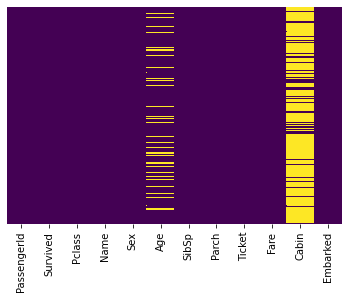

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

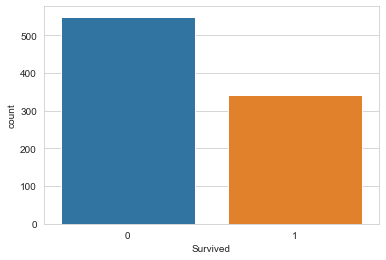

In [9]:
sns.countplot(data=train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

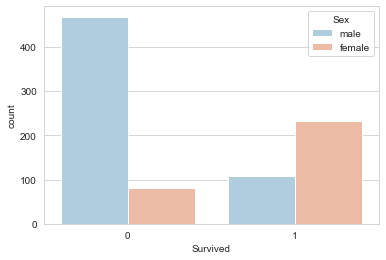

In [10]:
sns.countplot(data=train, x='Survived', hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

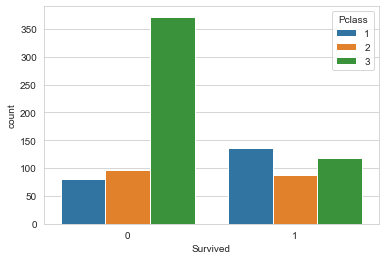

In [11]:
sns.countplot(data=train, x='Survived', hue='Pclass')

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

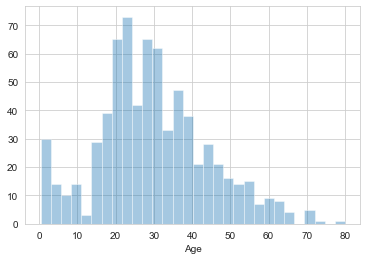

In [12]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:ylabel='Frequency'>

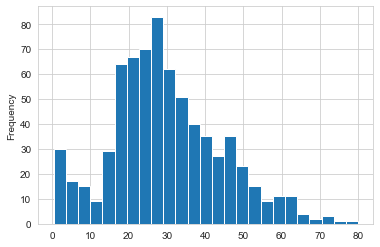

In [13]:
train['Age'].plot.hist(bins=25)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

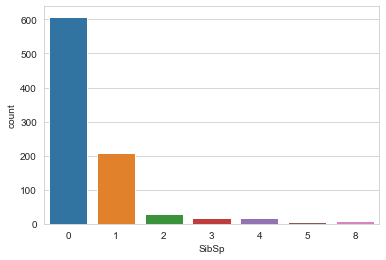

In [15]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

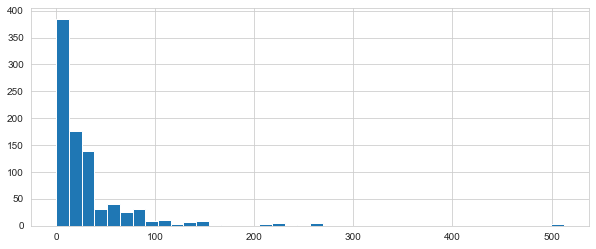

In [16]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [17]:
import cufflinks as cf

In [18]:
cf.go_offline()

In [19]:
train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

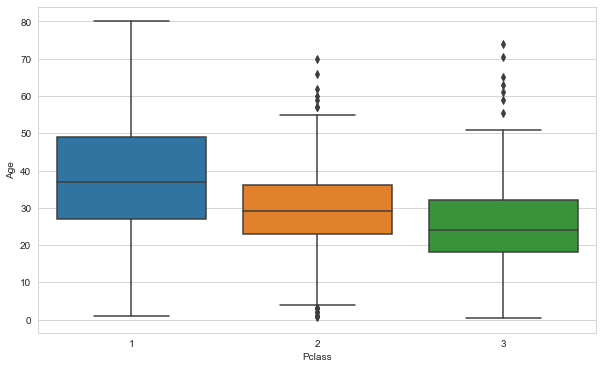

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [22]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

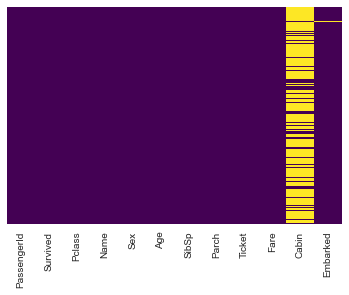

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
train.drop('Cabin', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

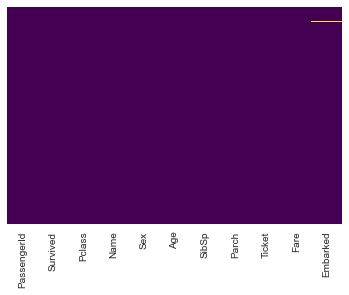

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
train.dropna( inplace=True )

<AxesSubplot:>

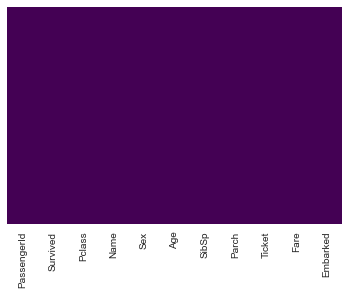

In [28]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [29]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [30]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [31]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [32]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
train = pd.concat([train,sex,embarked], axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [35]:
#we got male,Q,S as new columns; we dont need the sex,embarked column as we have its boolean values

In [36]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [38]:
#passengerId is just the index so we are gonna drop it




In [39]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [40]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
#Building a Logistic Regression model

In [42]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [43]:
from sklearn.model_selection import train_test_split 

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train, y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
predictions = logmodel.predict(X_test)

In [49]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print( classification_report( y_test,predictions ))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       163
           1       0.80      0.68      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix( y_test,predictions )

array([[145,  18],
       [ 33,  71]], dtype=int64)

In [54]:
#Trying Desicion tree 

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()

In [60]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
#Predictions and evaluation

In [62]:
predictions = dtree.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       160
           1       0.71      0.72      0.72       107

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [65]:
print(confusion_matrix(y_test,predictions))

[[129  31]
 [ 30  77]]


In [66]:
#random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
rfc_pred = rfc.predict(X_test)

In [69]:
print(confusion_matrix(y_test,rfc_pred))

[[137  23]
 [ 25  82]]


In [70]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       160
           1       0.78      0.77      0.77       107

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[180  38]
 [ 33 105]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       218
           1       0.73      0.76      0.75       138

    accuracy                           0.80       356
   macro avg       0.79      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



In [72]:
#KNN

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
scaler.fit(train.drop('Survived',axis=1))

StandardScaler()

In [77]:
scaled_features = scaler.transform(train.drop('Survived',axis=1))

In [78]:
train_feat = pd.DataFrame(scaled_features,columns=train.columns[1:])
train_feat.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.825209,-0.495519,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.572211,0.720711,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,0.825209,-0.191461,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.572211,0.492668,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,0.825209,0.492668,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Survived'],
                                                    test_size=0.30)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=1)

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [84]:
pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(confusion_matrix(y_test,pred))

[[129  28]
 [ 34  76]]


In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       157
           1       0.73      0.69      0.71       110

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [91]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[129  28]
 [ 34  76]]


              precision    recall  f1-score   support

           0       0.79      0.82      0.81       157
           1       0.73      0.69      0.71       110

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [92]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[139  18]
 [ 42  68]]


              precision    recall  f1-score   support

           0       0.77      0.89      0.82       157
           1       0.79      0.62      0.69       110

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.78      0.77       267



In [93]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[143  14]
 [ 45  65]]


              precision    recall  f1-score   support

           0       0.76      0.91      0.83       157
           1       0.82      0.59      0.69       110

    accuracy                           0.78       267
   macro avg       0.79      0.75      0.76       267
weighted avg       0.79      0.78      0.77       267



In [94]:
# NOW WITH K=50
knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=50')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=50


[[135  22]
 [ 49  61]]


              precision    recall  f1-score   support

           0       0.73      0.86      0.79       157
           1       0.73      0.55      0.63       110

    accuracy                           0.73       267
   macro avg       0.73      0.71      0.71       267
weighted avg       0.73      0.73      0.73       267



In [95]:
# NOW WITH K=70
knn = KNeighborsClassifier(n_neighbors=70)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=70')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=70


[[133  24]
 [ 49  61]]


              precision    recall  f1-score   support

           0       0.73      0.85      0.78       157
           1       0.72      0.55      0.63       110

    accuracy                           0.73       267
   macro avg       0.72      0.70      0.71       267
weighted avg       0.73      0.73      0.72       267



In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[139  18]
 [ 32  78]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       110

    accuracy                           0.81       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[140  17]
 [ 33  77]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.70      0.75       110

    accuracy                           0.81       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))

print(classification_report(y_test,rfc_pred))

[[141  16]
 [ 32  78]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       157
           1       0.83      0.71      0.76       110

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



In [99]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[137  20]
 [ 38  72]]


              precision    recall  f1-score   support

           0       0.78      0.87      0.83       157
           1       0.78      0.65      0.71       110

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [100]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [101]:
#SVM

In [102]:
from sklearn.model_selection import train_test_split


In [103]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [104]:
from sklearn.svm import SVC

In [105]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [106]:
predictions = svc_model.predict(X_test)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [108]:
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

[[144  18]
 [ 78  27]]
0.6404494382022472


In [109]:
#GRID SEARCH

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [112]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [113]:
grid_predictions = grid.predict(X_test)

In [114]:
print(confusion_matrix(y_test,grid_predictions))

print(classification_report(y_test,grid_predictions))

[[131  31]
 [ 29  76]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       162
           1       0.71      0.72      0.72       105

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



In [115]:
##Gaussian Naive Bayes model 

In [116]:
  
# store the feature matrix (X) and response vector (y)
X = train.drop('Survived', axis=1)
y = train.Survived
  
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 80.33707865168539
